# 1. Giới thiệu

Python hỗ trợ  đối với văn bản Unicode, chuỗi ký tự đa dạng thức được sử dụng trong các ứng dụng quốc tế, cũng như dữ liệu nhị phân, chuỗi đại diện cho các giá trị byte.

Để lưu trữ nhiều văn bản trong bộ nhớ máy tính các ký tự được dịch sang và từ các byte thô bằng cách sử dụng mã hóa sao đó giải mã và hiện thị ra màn hình.

+ Mã hóa(encode) là quá trình dịch một chuỗi ký tự sang dạng byte thô của nó, theo một tên mã hóa mong muốn.

+ Giải mã(decode) là quá trình dịch một chuỗi byte thô thành chuỗi ký tự của nó theo tên mã hóa của nó.

**Example: chuyển đổi chữ 'ni' và giải mã quan các bản mã phổ biến như ascii, latin-1, utf-8,...**

In [6]:
s='ni'
s.encode('ascii')

b'ni'

In [7]:
s.encode('latin1')

b'ni'

In [8]:
s.encode('utf8')

b'ni'

In [9]:
s.encode('utf16')

b'\xff\xfen\x00i\x00'

In [10]:
len(s.encode('utf16'))

6

In [11]:
s.encode('utf32')

b'\xff\xfe\x00\x00n\x00\x00\x00i\x00\x00\x00'

In [12]:
len(s.encode('utf32'))

12

Trong Python 3.X có ba loại đối tượng chuỗi, một cho dữ liệu văn bản và hai cho dữ liệu nhị phân:

+ **str** để biểu diễn văn bản Unicode đã được giải mã (bao gồm ASCII)
+ **byte** để biểu diễn dữ liệu nhị phân (bao gồm cả văn bản được mã hóa)
+ **bytearray**, một kiểu có thể thay đổi (mutable) cho kiểu byte

# 2. Mã hóa cơ bản kiểu string

In [1]:
B=b'spam'
S='egg'
B

b'spam'

In [4]:
type(B),type(S)

(bytes, str)

In [5]:
B[0],S[0]

(115, 'e')

In [22]:
B[1:],S[1:]

(b'pam', 'gg')

In [23]:
list(B),list(S)

([115, 112, 97, 109], ['e', 'g', 'g'])

Và điều quan trọng là giống như kiểu string thì kiểu bytes cũng sẽ không thể thay đổi được.

```python
B[0]='x'
```
`Output:`TypeError: 'bytes' object does not support item assignment

In [3]:
B=B"""
xxxx
yyyy
"""

In [2]:
B

b'\nxxxx\nyyyy\n'

In [4]:
U=u'spam'

In [5]:
type(U)

str

In [6]:
list(U)

['s', 'p', 'a', 'm']

In [45]:
B=b'spam'
type(B)

bytes

## Chuyển đổi kiểu string

In [46]:
S='egg'
S.encode()

b'egg'

In [47]:
bytes(S,encoding='ascii')

b'egg'

In [48]:
B=b'spam'
B.decode()

'spam'

In [49]:
str(B,encoding='ascii')

'spam'

### Xem encoding của hệ thống

In [50]:
import sys
sys.platform

'win32'

In [51]:
sys.getdefaultencoding()

'utf-8'

In [54]:
str(B)

"b'spam'"

In [55]:
len(str(B))

7

In [57]:
len(str(B,encoding='ascii'))

4

## Mã hóa unicode string

In [58]:
chr(88)

'X'

In [60]:
[ord(i) for i in 'abc']

[97, 98, 99]

In [61]:
'abc'.encode("ascii")

b'abc'

In [62]:
'abc'.encode("latin-1")[0]

97

## Mã hóa với non - ascii 

In [63]:
chr(0xc4)

'Ä'

In [64]:
chr(0xe8)

'è'

Viết ở dạng unicode 8 bit.

In [8]:
S='\xc4\xe8'
S

'Äè'

In [67]:
len(S)

2

Viết ở dạng unicode 16 bit.

In [9]:
S='\u00c4\u00e8'
S

'Äè'

In [71]:
S.encode('latin-1')

b'\xc4\xe8'

In [72]:
S.encode('utf-8')

b'\xc3\x84\xc3\xa8'

In [73]:
B=b'\xc4\xe8'
B

b'\xc4\xe8'

In [74]:
len(B)

2

In [75]:
B.decode('latin-1')

'Äè'

In [76]:
B=b'\xc3\x84\xc3\xa8'
B.decode('utf8')

'Äè'

In [7]:
S='A\u00c4B\U000000e8C'
S

'AÄBèC'

In [8]:
len(S)

5

In [9]:
S.encode('latin-1')

b'A\xc4B\xe8C'

In [10]:
len(S.encode('latin-1'))

5

In [11]:
S.encode('utf-8')

b'A\xc3\x84B\xc3\xa8C'

In [12]:
len(S.encode('utf-8'))

7

## Kết nối string

In [14]:
S='A'+chr(0xC4)+'B'+chr(0xE8)+'C'
S

'AÄBèC'

In [15]:
S.encode('cp500')

b'\xc1c\xc2T\xc3'

In [16]:
S.encode('cp850')

b'A\x8eB\x8aC'

In [17]:
S='spam'

In [18]:
S.encode('utf8')

b'spam'

In [20]:
S.encode('cp500')

b'\xa2\x97\x81\x94'

In [21]:
S.encode('cp850')

b'spam'

In [22]:
S='A\u00c4B\U000000e8C'
S

'AÄBèC'

In [23]:
S.encode('utf16')

b'\xff\xfeA\x00\xc4\x00B\x00\xe8\x00C\x00'

In [25]:
S.encode('utf32')

b'\xff\xfe\x00\x00A\x00\x00\x00\xc4\x00\x00\x00B\x00\x00\x00\xe8\x00\x00\x00C\x00\x00\x00'

In [27]:
S='A\xC4B\xE8C'
S

'AÄBèC'

In [28]:
S='A\u00c4B\U000000e8C'
S

'AÄBèC'

In [29]:
B=b'A\xC4B\xE8C'
B

b'A\xc4B\xe8C'

In [30]:
print(B)

b'A\xc4B\xe8C'


In [31]:
B.decode('latin-1')

'AÄBèC'

In [32]:
S='AÄBèC'
S

'AÄBèC'

In [33]:
S.encode()

b'A\xc3\x84B\xc3\xa8C'

In [34]:
S.encode('utf8')

b'A\xc3\x84B\xc3\xa8C'

In [35]:
B=b'A\xc3\x84B\xc3\xa8C'
S=B.decode('utf8')
S

'AÄBèC'

In [38]:
T=S.encode('cp500')
T

b'\xc1c\xc2T\xc3'

In [39]:
U=T.decode('cp500')
U

'AÄBèC'

In [40]:
U.encode()

b'A\xc3\x84B\xc3\xa8C'

In [41]:
U=u'A\xC4B\xE8C'
U

'AÄBèC'

In [42]:
U.encode('latin-1')

b'A\xc4B\xe8C'

In [43]:
U.encode('utf8')

b'A\xc3\x84B\xc3\xa8C'

In [44]:
u'ab'+'cd'

'abcd'

In [45]:
'abc'+u'A\xC4B\xE8C'

'abcAÄBèC'

In [46]:
print(u"\xA3"+'999.99')

£999.99


In [47]:
str(u'spam')

'spam'

In [51]:
#-*-coding:latin-1-*-

In [52]:
#-*-coding:latin-1-*-
# Bất cứ khi nào bạn sử dụng
# Thay đổi giá trị


In [53]:
myStr1='aÄBèC'

In [54]:
myStr2='A\u00c4B\U000000e8C'

In [55]:
myStr3='A'+chr(0xC4)+'B'+chr(0xE8)+'C'


In [57]:
import sys
print('encoding mặc định',sys.getdefaultencoding())

encoding mặc định utf-8


In [61]:
for aStr in myStr1, myStr2, myStr3:
    print('{0},strlen={1}, '.format(aStr,len(aStr),end=''))
    byte1=aStr.encode()
    byte2=aStr.encode('latin-1')
#     byte3=aStr.encode('ascii')
    print('byteslen1={0},byteslen2={1}'.format(len(byte1),len(byte2)))

aÄBèC,strlen=5, 
byteslen1=7,byteslen2=5
AÄBèC,strlen=5, 
byteslen1=7,byteslen2=5
AÄBèC,strlen=5, 
byteslen1=7,byteslen2=5


In [64]:
set(dir('abc'))-set(dir(b'abc'))

{'casefold',
 'encode',
 'format',
 'format_map',
 'isdecimal',
 'isidentifier',
 'isnumeric',
 'isprintable'}

In [66]:
set(dir(b'abc'))-set(dir('abc'))

{'decode', 'fromhex', 'hex'}

In [67]:
B=b'spam'

In [68]:
B.find(b'pa')

1

In [70]:
B.replace(b'pa',b'XY')

b'sXYm'

In [71]:
B.split(b'pa')

[b's', b'm']

In [74]:
'%s'%99

'99'

In [77]:
'{}'.format(99)

'99'

In [1]:
B=b'spam'
B

b'spam'

In [2]:
B[0]

115

In [3]:
B[-1]

109

In [4]:
chr(B[0])

's'

In [5]:
list(B)

[115, 112, 97, 109]

In [6]:
B[1:]

b'pam'

In [7]:
B*4

b'spamspamspamspam'

In [8]:
B=bytes('abc','ascii')

In [9]:
B

b'abc'

In [10]:
ord('a')

97

In [11]:
bytes([97,98,99])

b'abc'

In [12]:
'spam'.encode()

b'spam'

In [13]:
B=B'spam'
B.replace(bytes('pa','ascii'),bytes('xy','utf-8'))

b'sxym'

In [14]:
b'ab'.decode()+'cd'

'abcd'

In [15]:
b'ab'+'cd'.encode()

b'abcd'

In [16]:
b'ab'+bytes('cd','ascii')

b'abcd'

In [21]:
S='spam'
C=bytearray(S,'latin-1')
C

bytearray(b'spam')

In [22]:
B=b'spam'
C=bytearray(B)
C

bytearray(b'spam')

In [23]:
C[0]

115

In [25]:
C[0]=ord('x')

In [26]:
C

bytearray(b'xpam')

In [27]:
C[1]=b'Y'[0]

In [28]:
C

bytearray(b'xYam')

In [29]:
set(dir(b'abc'))-set(dir(bytearray(b'abc')))

{'__getnewargs__'}

In [30]:
set(dir(bytearray(b'abc')))-set(dir(b'abc'))

{'__alloc__',
 '__delitem__',
 '__iadd__',
 '__imul__',
 '__setitem__',
 'append',
 'clear',
 'copy',
 'extend',
 'insert',
 'pop',
 'remove',
 'reverse'}

In [31]:
C

bytearray(b'xYam')

In [34]:
C.append(ord('L'))
C

bytearray(b'xYamLL')

In [35]:
C.extend(b'L')

In [36]:
C

bytearray(b'xYamLLL')

In [37]:
C+b'!#'

bytearray(b'xYamLLL!#')

In [38]:
C[0]

120

In [39]:
C[1:]

bytearray(b'YamLLL')

In [40]:
len(C)

7

In [42]:
C.replace(b'xY',b'sp')

bytearray(b'spamLLL')

In [43]:
C

bytearray(b'xYamLLL')

In [44]:
C*4

bytearray(b'xYamLLLxYamLLLxYamLLLxYamLLL')

In [45]:
B

b'spam'

In [46]:
list(B)

[115, 112, 97, 109]

In [47]:
C

bytearray(b'xYamLLL')

In [48]:
list(C)

[120, 89, 97, 109, 76, 76, 76]

In [49]:
S

'spam'

In [50]:
list(S)

['s', 'p', 'a', 'm']

In [52]:
file=open('temp','w')
size=file.write('abc\n')
file.close()

In [53]:
file=open('temp')
text=file.read()
text

'abc\n'

In [54]:
print(text)

abc



In [55]:
open('temp','w').write('abc\n')

4

In [57]:
open('temp','r').read()

''

In [58]:
open('temp','rb').read()

b''

In [59]:
open('temp','wb').write(b'abc\n')

4

In [60]:
open('temp','r').read()

'abc\n'

In [61]:
open('temp','rb').read()

b'abc\n'

In [62]:
open('temp','wb').write(b'a\x00c')

3

In [63]:
open('temp','r').read()

'a\x00c'

In [64]:
open('temp','rb').read()

b'a\x00c'

In [66]:
BA=bytearray(b'\x01\x02\x03')

In [67]:
open('temp','wb').write(BA)

3

In [68]:
open('temp','r').read()

'\x01\x02\x03'

In [69]:
open('temp','rb').read()

b'\x01\x02\x03'

In [70]:
chr(0xFF)

'ÿ'

In [71]:
chr(0xFE)

'þ'

In [72]:
open('temp','w').write('\xFF\xFE\xFD')

3

In [74]:
open('temp','wb').write(b'\xFF\xFE\xFD')

3

In [75]:
open('temp','rb').read()

b'\xff\xfe\xfd'

In [76]:
open('temp','r').read()

'ÿþý'

In [77]:
S='A\xc4B\xe8C'
S

'AÄBèC'

In [78]:
L=S.encode('latin-1')

In [79]:
L

b'A\xc4B\xe8C'

In [80]:
U=S.encode('utf-8')

In [81]:
U

b'A\xc3\x84B\xc3\xa8C'

In [82]:
len(U)

7

In [88]:
open('latindata','w',encoding='latin-1').write(S)

5

In [89]:
open('utf8data','w',encoding='utf-8').write(S)

5

In [90]:
open('latindata','rb').read()

b'A\xc4B\xe8C'

In [91]:
open('utf8data','rb').read()

b'A\xc3\x84B\xc3\xa8C'

In [92]:
open('latindata','r',encoding='latin-1').read()

'AÄBèC'

In [93]:
open('utf8data','r',encoding='utf-8').read()

'AÄBèC'

In [94]:
X=open('latindata','rb').read()

In [95]:
X.decode('latin-1')

'AÄBèC'

In [96]:
X=open('utf8data','rb').read()

In [97]:
X.decode()

'AÄBèC'

In [104]:
import re
S='Trai dat mau xanh da'
B=b'Trai dat mau xanh da '
re.match('(.*) dat (.*) xanh (.*)',S).groups()

('Trai', 'mau', 'da')

In [106]:
re.match(b'(.*) dat (.*) xanh (.*)',B).groups()

(b'Trai', b'mau', b'da ')

In [109]:
re.match(b'(.*) dat (.*) xanh (.*)',bytearray(B)).groups()

(b'Trai', b'mau', b'da ')

In [110]:
from struct import pack
pack('>i4sh',7,b'spam',8)

b'\x00\x00\x00\x07spam\x00\x08'

In [111]:
B=pack('>i4sh',7,b'spam',8)
B

b'\x00\x00\x00\x07spam\x00\x08'

In [113]:
import struct
vals=struct.unpack('>i4sh',B)
vals

(7, b'spam', 8)

In [114]:
F=open('data.bin','wb')
import struct
data=struct.pack('>i4sh',7,b'spam',8)
data

b'\x00\x00\x00\x07spam\x00\x08'

In [115]:
F.write(data)

10

In [117]:
F.close()

In [118]:
F=open('data.bin','rb')
data=F.read()

In [119]:
data

b'\x00\x00\x00\x07spam\x00\x08'

In [120]:
values=struct.unpack('>i4sh',data)
values

(7, b'spam', 8)

In [121]:
bin(values[0])

'0b111'

In [122]:
values[0]&0x01

1

In [123]:
values[0]|0b1010

15

In [125]:
bin(values[0]|0b1010)

'0b1111'

In [126]:
bin(values[0]^0b1010)

'0b1101'

In [128]:
bool(values[0]&0b100)

True

In [129]:
bool(values[0]&0b1000)

False

In [130]:
values[1]

b'spam'

In [131]:
values[1][0]

115

In [132]:
values[1][1:]

b'pam'

In [133]:
bin(values[1][0])

'0b1110011'

In [134]:
bin(values[1][0]|0b1100)

'0b1111111'

In [135]:
import pickle
pickle.dumps([1,2,3])

b'\x80\x03]q\x00(K\x01K\x02K\x03e.'

In [136]:
pickle.dumps([1,2,3],protocol=0)

b'(lp0\nI1\naI2\naI3\na.'

In [138]:
pickle.dump([1,2,3],open('temp','wb'))

In [139]:
open('temp','r').read()

'€\x03]q\x00(K\x01K\x02K\x03e.'

In [140]:
pickle.dump([1,2,3],open('temp','wb'))
pickle.load(open('temp','rb'))
open('temp','rb').read()

b'\x80\x03]q\x00(K\x01K\x02K\x03e.'

In [141]:
pickle.dump([1,2,3],open('temp','wb'))
pickle.load(open('temp','rb'))

[1, 2, 3]

In [144]:
import re
text=open('mybooks.xml').read()
found=re.findall('<title>(.*)</title>',text)
for title in found: print(title)

Learning Python
Programing Python
Python Pocket Reference


In [145]:
from xml.dom.minidom import parse,Node
xmltree=parse('mybooks.xml')
for node1 in xmltree.getElementsByTagName('title'):
    for node2 in node1.childNodes:
        if node2.nodeType==Node.TEXT_NODE:
            print(node2.data)

Learning Python
Programing Python
Python Pocket Reference


In [148]:
import xml.sax.handler
class BookHandler(xml.sax.handler.ContentHandler):
    def __init__(self):
        self.inTitle=False
    def startElement(self,name,attributes):
        if name=='title':
            self.inTitle=True
    def characters(self,data):
        if self.inTitle:
            print(data)
    def endElement(self,name):
        if name=='title':
            self.inTitle=False
import xml.sax
parser=xml.sax.make_parser()
handler=BookHandler()
parser.setContentHandler(handler)
parser.parse('mybooks.xml')

Learning Python
Programing Python
Python Pocket Reference


In [149]:
from xml.etree.ElementTree import parse
tree=parse('mybooks.xml')
for E in tree.findall('title'):
    print(E.text)

Learning Python
Programing Python
Python Pocket Reference


# Tóm tắt các loại dữ liệu trong python lõi

+ Các đối tượng hoạt động theo index: string, list và tuple tất cả đều có thao tác như concatenation, độ dài và index.

+ Các đối tượng có thể thay đổi(mutable) như list, dictionart và set — có thể được thay đổi tại index, còn đối với numbers, string, tuple không thể thay đổi(immutable) tại index.

## Chia kiểu dữ liệu dựa vào collections

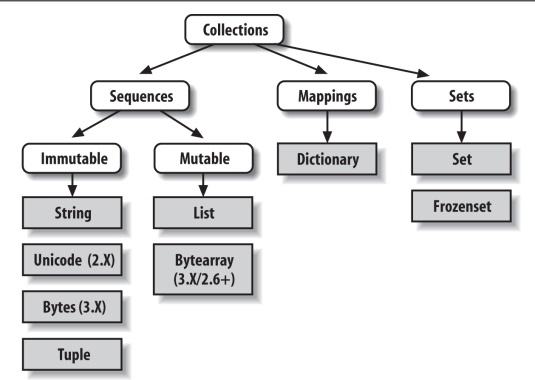

## Các kiểu dữ liệu trong số học (numbers)

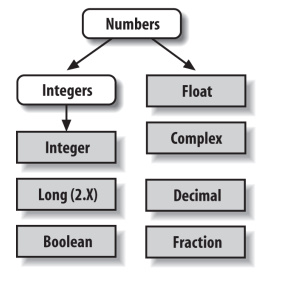

## Các hàm, lớp, trình sinh có thể gọi được

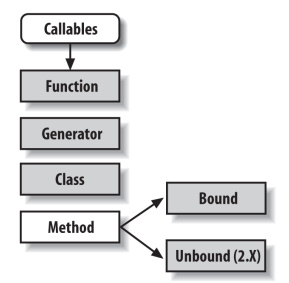

## Các đối tượng khác

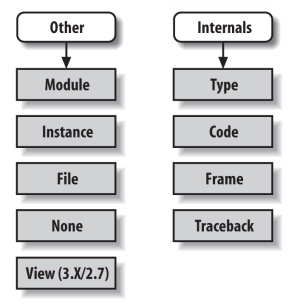

In [ ]:
frame